<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Introducción a los algortimos evolutivos con python DEAP

<img src="https://deap.readthedocs.io/en/master/_images/deap_long.png" width="400"></img>


DEAP es un librería de *cálculo evolutivo* para la creación rápida de prototipos soluciones en este campo. Busca hacer que los algoritmos sean explícitos y las estructuras de datos transparentes.

DEAP incluye las siguientes características:

* Algoritmos genéticos usando cualquier representación imaginable
* Lista, Matriz, Conjunto, Diccionario, Árbol, Matriz Numpy, etc.
* Programación genética usando árboles de prefijos
* Estrategias de evolución (incluido CMA-ES)
* Optimización multiobjetivo (NSGA-II, NSGA-III, SPEA2, MO-CMA-ES)
* Co-evolución (cooperativa y competitiva) de múltiples poblaciones
* Ejemplos de algoritmos alternativos: optimización del enjambre de partículas, evolución diferencial, estimación del algoritmo de distribución

Documentación de DEAP https://deap.readthedocs.io/en/master/

**Notebook por: David Rey**

In [ ]:
#
# Carga de librerías
#
import sys
if 'deap' not in sys.modules:
  !pip install deap
import array
import random
import numpy
import math
import deap as deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


# Introducción de conceptos de DEAP

Introduciremos unos conceptos básicos de la librería DEAP para comprender el funcionamiento de la creación de un algoritmo genético.

## Creación de elementos - El objeto creator

La clase *creator* es una **meta-factoría** de clases que permite crear elementos que usaremos en nuestros algoritmos de forma flexible. Permite crear clases de python de cualquier tipo.

En este ejemplo creamos la *clásica* clase Foo que hereda de la librería estándar y que tiene un atributo *bar* como un diccionario vacío, demás crearemos un atributo estático llamado *spam* inicializado a 1




In [ ]:
creator.create("Foo", list, bar=dict, spam=1)

Vemos que nos ha creado una clase *normal* de python

In [ ]:
pprint(vars(creator.Foo))

mappingproxy({'__dict__': <attribute '__dict__' of 'Foo' objects>,
              '__doc__': None,
              '__init__': <function MetaCreator.__init__.<locals>.init_type at 0x7dbbffdb8160>,
              '__module__': 'deap.creator',
              '__weakref__': <attribute '__weakref__' of 'Foo' objects>,
              'bar': <class 'dict'>,
              'reduce_args': ('Foo',
                              <class 'list'>,
                              {'bar': <class 'dict'>, 'spam': 1}),
              'spam': 1})


Sería exactamente lo mismo que si la crearamos *a mano*

In [ ]:
class Foo(list):
    spam = 1

    def __init__(self):
        self.bar = dict()

comprobamos que efectivamente es así

In [ ]:
pprint(vars(creator.Foo))

mappingproxy({'__dict__': <attribute '__dict__' of 'Foo' objects>,
              '__doc__': None,
              '__init__': <function MetaCreator.__init__.<locals>.init_type at 0x7dbbffdb8160>,
              '__module__': 'deap.creator',
              '__weakref__': <attribute '__weakref__' of 'Foo' objects>,
              'bar': <class 'dict'>,
              'reduce_args': ('Foo',
                              <class 'list'>,
                              {'bar': <class 'dict'>, 'spam': 1}),
              'spam': 1})


## Creación de la clase Fitness
La clase **Fitness** es una clase abtracta (que no podemos utilizar directamente) que necesita un atributo de pesos para ser funcional. Manejaremos dos formatos, el de la minimización y el de la maximización para el primero usaremos un peso negativo y para el segundo un peso positivo. En este ejemplo creamos una nueva clase que nos ayudará a evaluar el firtness de un valor llamada *FitnessMin*. Como antes usaremos el *creator* para definirla.

Referencia: https://deap.readthedocs.io/en/master/api/base.html#deap.base.Fitness



In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
pprint(vars(creator.FitnessMin))

mappingproxy({'__doc__': None,
              '__init__': <function MetaCreator.__init__.<locals>.init_type at 0x7dbbffdb89d0>,
              '__module__': 'deap.creator',
              'reduce_args': ('FitnessMin',
                              <class 'deap.base.Fitness'>,
                              {'weights': (-1.0,)}),
              'weights': (-1.0,)})


## Toolbox

El *toolbox* contiene los distintos operadores evolutivos. La incorporación de nuevos operadores se realiza usando la función *register()*. Se pueden reaprovechar los toolbox haciendo una copia usando el método *clone()*.

Una vez registrador o declarados, los operadores se pueden acceder directamente por el nombre. Como en este ejemplo donde creamos una nueva función que llamaremos **myFunc**.


In [ ]:
from deap.base import Toolbox

# Definimos la función
def func(a, b, c=3):
     print(a, b, c)

def otra():
  print('hola')

# Creamos un toolbox
tools = Toolbox()

# registramos la función
tools.register("myFunc", func, 2, c=4)

# registramos la función
tools.register("myFunc2", otra)


# usamos la función a través del toolbox
tools.myFunc(3)
tools.myFunc2()

2 3 4
hola


## Individuos y poblaciones

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMax)
creator.create("Individual", numpy.ndarray, fitness=creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Dada la gran variedad de tipos de algoritmos evolutivos que existen (GA, GP, ES, PSO, DE, …), habría una gran variedad de *individuos* a definir. Por tanto el sistema de creación de los mismos debe ser lo más flexible posible. En la librería existe una referencia de cómo crear indivudios y usarlos a través del Toolbox: https://deap.readthedocs.io/en/master/api/base.html#deap.base.Toolbox



## Creación de individuos

En primer lugar definimos cómo es el individuo, para ello usamos el método *register()* comentado anteriormente toma al menos dos argumentos; un alias y una función asignada a este alias. Cualquier argumento posterior se pasa a la función cuando se llama. Por tanto, el código anterior crea dos alias en el toolbox; **attr_float** e **individual**. El primero redirige a la función *random.random()*. El segundo es un enlace/atajo a la función *initRepeat()*, fijando su argumento contenedor a la clase creator.Individual, su argumento func a la función toolbox.attr_float() y su argumento número de repeticiones a IND_SIZE.

Por tanto, llamar a toolbox.individual() llamará a initRepeat() con los argumentos fijos y devolverá un creador completo. Individual compuesto de números de punto flotante IND_SIZE con un atributo de fitness objetivo único maximizador.

In [ ]:
from deap import tools

IND_SIZE=10
toolbox = base.Toolbox()

#
# definimos un tipo de atributos en este caso flotante, que se generaría de forma aleatoria
#
toolbox.register("attr_float", random.random)

#
# El individuo se construye como una repetición de IND_SIZE atributos de tipo attr_float
#
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)

Este método puede ser complicado, por tanto se pueden usar heredar las propiedades directamente de array.array o numpy.ndarray de la siguiente manera.

### Creación de poblaciones
Las poblaciones son un conjunto de individuos y se declaran así, la población más habitual es la de tipo *bag*, no tiene ningun órden y sería equivalente a una lista. La población se incializa usando el toolbox y el método initRepeat().

En este caso registramos la población como una función *generadora* de individuos.

In [ ]:
#
# Creamos un inviduo de tipo binario (bit), para un problema de maximización
#
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

#
# Generador de atributosructura
#
toolbox.register("attr_bool", random.randint, 0, 1)

#
# Inicializadores de la estructura
# Inviduo como 100 bits y población como una repetición de individuos
#
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)

#
# Registramos la población como un 'bag' de inviduos (vemos como podemos registrar distintas poblaciones en el toolbox)
#
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("poblacion", tools.initRepeat, list, toolbox.individual)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#
# El de la primera población registrada (lo instanciamos aquí)
#
pop = toolbox.poblacion(n=200)
len(pop)

200

In [ ]:
pop[1]

Individual('b', [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
#
# El de la segunda población registrada (lo instanciamos aquí)
#
pop = toolbox.population(n=100)
len(pop)

100

Vemos un indiduo de esa población, es importante entender que **population** es una función que crea una población cuyo tamaño se pasa como parámetro.

In [ ]:
pop[0]

Individual('b', [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

Existen otras estrategia de cara a crear la población como usando un conjunto semilla de individuos.

Ejemplo seeding a population: https://deap.readthedocs.io/en/master/tutorials/basic/part1.html?highlight=seeding#seeding-a-population

# Primer algortimo genético - onemax

Empezamos con nuestro ejemplo *onemax* con individuos basados cuyo genotipo en una lista de bits. Definiremos un caso de maximización.

## Definición objetivo del problema a resolver

Primero definiremos la clase FitnessMax. Heredamos la clase Fitness del módulo **deap.base** y contendrá un atributo adicional llamado **weights**. Tenga en cuenta que el valor de los pesos es la tupla $(1.0,)$. De esta forma estaremos maximizando un fitness objetivo único. Aunque parezca evidente, en DEAP los objetivos únicos son un caso especial de objetivos múltiples.

A continuación crearemos la clase Individual, que heredará la lista de clases y contendrá nuestra clase *FitnessMax* y la asignaremos al atributo *fitness*.Después de la creación, todas nuestras clases definidas serán parte del contenedor del creador y se pueden llamar directamente usando los *alias*

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

 ## ¿Cómo van a ser nuestros individuos y nuestra población?


En este bloque de código registramos una función de generación **toolbox.attr_bool()** y dos de inicialización **individual()** y **population()**. Cuando se llama **toolbox.attr_bool()** se mostrarrá un número entero aleatorio entre 0 y 1. Los dos *constructores*, por otro lado, instanciarán un individuo o población.

El registro de los operadores en el toolbox solo asocia alias a las funciones ya existentes y congela parte de sus argumentos. Esto nos permite fijar una cantidad arbitraria de argumentos en ciertos valores, por lo que solo tenemos que especificar los restantes al llamar al método. Por ejemplo, el generador *attr_bool()* se crea a partir de la función *randint()* que toma dos argumentos ayb, con *a <= n <= b*, donde *n* es el entero devuelto. Aquí, fijamos *a = 0* y *b = 1*.

Nuestros individuos se generarán utilizando la función *initRepeat()*. Su primer argumento es una clase contenedora, en nuestro ejemplo la Individual que definimos en la sección anterior. Este contenedor se llenará usando el método *attr_bool()*, que se pasa como segundo argumento, y contendrá 100 enteros, como se especifica usando el tercer argumento.

Cuando se llama el método *individual()*, devolverá un individuo inicializado con lo que se devolvería llamando al método *attr_bool()* 100 veces. Finalmente, el método de *population()* usa el mismo paradigma, pero no fijamos la cantidad de individuos que debería contener.

In [ ]:
#
# Creamos una instancia del toolbox, va a contener nuestros operadores
#
#
toolbox = base.Toolbox()

# Creamos un generador de atributos (alias, método, parámetros ...)
toolbox.register("attr_bool",
                 random.randint, 0, 1)

# Y registramos al individuo con su creador (cada individuo será un cromosoma de 100 bits)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_bool,
                 100)

# Y registramos a la población como un tipo 'bag'
toolbox.register("population",
                 tools.initRepeat,
                 list,
                 toolbox.individual)

## Declaración de la función de evaluación
Definimos nuestra función de evaluación que se tomará como base para la evaluación de la función de fitness. **Importante**, básicamente el fitness que maneja el algoritmo es el peso declarado en nuestra función de fitness * valor dela función de evaluación)

In [ ]:
def evalOneMax(individual):
    return sum(individual),

## Operadores genéticos

Dentro de DEAP hay dos formas de utilizar operadores. Podemos simplemente llamar a una función desde el módulo de herramientas o registrarla con sus argumentos en un *toolbox*, como ya hemos visto antes. Sin embargo, la forma más adecuada es registrarlos, ya que esto nos permite cambiar fácilmente entre los operadores si se quiera.

El registro de los operadores genéticos necesarios para la evolución en nuestro problema One Max y sus argumentos predeterminados en el *toolbox* se realiza de la siguiente manera:

* Funcion de cruce: [cxTwoPoint](https://deap.readthedocs.io/en/master/api/tools.html?highlight=cxTwoPoint#deap.tools.cxTwoPoint)
* Función de mutación: [mutFlipBit](https://deap.readthedocs.io/en/master/api/tools.html?highlight=mutFlipBit#deap.tools.mutFlipBit)
* Estrategia de selección: [selTournament](https://deap.readthedocs.io/en/master/api/tools.html?highlight=selTournament#deap.tools.selTournament)

In [ ]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=2)

La evaluación se realizará llamando al alias evaluar (es preferible no  no fijar aquí su argumento). Lo necesitaremos más adelante para aplicar la función a cada individuo separado de nuestra población. La mutación, por otro lado, necesita un argumento (la probabilidad independiente de que mutar cada atributo **indpb**).

Las selección por torneo (ver definión en https://en.wikipedia.org/wiki/Tournament_selection) establece que la selección para el cruce se realiza entre n (tournsize) individuos. Al primero se le asigna una probabilidad $p$, al segundo $p\cdot(p-1)$, al tercero $p\cdot(p-1)^2$, y en general al individuo $n$ se le asignaría una probabildiad de selección de $p\cdot(p-1)^{n-1}$

## Evolución de la población

Una vez elegidos la representación y los operadores genéticos, definiremos un algoritmo combinando todos los individuos y realizando la evolución de nuestra población hasta resolver el problema de One Max.



### Creación de la población

En primer lugar, necesitamos crear una instancia de nuestra población. Pero este paso se realiza sin esfuerzo utilizando el método de *population()* que registramos en nuestro *toolbox* anteriormente.

In [ ]:
#
# Instanciamos la población con 300 elementos
#
pop = toolbox.population(n=300)

In [ ]:
#
# Mostramos el primer elemento
#
print(pop[0])
print(sum(pop[0]))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
60


**pop** será una lista compuesta por 300 individuos. Dado que dejamos el parámetro n abierto durante el registro del método *polulation()* en nuestro toolbox, somos libres de crear poblaciones de tamaño arbitrario.

Lo siguiente que debemos hacer es evaluar nuestra nueva población.

In [ ]:
#
# Evaluamos la población (usamos el alias que hemos declarado antes), nos da lugar el el resultado del onemax
#
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
  ind.fitness.values = fit

La función **onemax** nos da lo que esperábamos

In [ ]:
fitnesses[0:10]

[(60,), (47,), (55,), (45,), (55,), (53,), (43,), (55,), (51,), (50,)]

Ejecutamos la función **map()** la función de evaluación a cada individuo y luego asignamos su respectivo **fitness**. Para este caso definiremos dos constantes.

In [ ]:
# CXPB  es la probabilidad de cruce entre dos individuos
CXPB  = 0.5

# MUTPB es la probilidad de mutación de un gen
MUTPB = 0.2

### Ejecutando la evolución
La evolución de la población es el último paso que tenemos que realizar. Importante, nuestros individuos constan de 100 bits y queremos evolucionar nuestra población hasta que obtengamos al menos un individuo que consta de solo 1 y no 0. Así que todo lo que tenemos que hacer es obtener los valores de fitness de los individuos.

In [ ]:
# Extracting all the fitnesses of
fits = [ind.fitness.values[0] for ind in pop]

y hacemos evolucionar nuestra población hasta que una de ellas llegue a 100 o el número de generaciones llegue a 1000.

In [ ]:
# Variable keeping track of the number of generations
g = 0

# Inicio
while max(fits) < 100 and g < 1000:
  #
  # Todos los pasos del proceso
  #
  g = g + 1
  if g % 100 == 0:
    print("-- Generación %i --" % g)

-- Generación 100 --
-- Generación 200 --
-- Generación 300 --
-- Generación 400 --
-- Generación 500 --
-- Generación 600 --
-- Generación 700 --
-- Generación 800 --
-- Generación 900 --
-- Generación 1000 --


La evolución en sí se llevará a cabo seleccionando, cruzando y mutando los individuos de nuestra población.

En nuestro ejemplo simple de un algoritmo genético, el primer paso es seleccionar la próxima generación.

In [ ]:
#
# Seleccionamos los individuos de la próxima generación
#
offspring = toolbox.select(pop, len(pop))

#
# Clonar los individuos elegidos
#
offspring = list(map(toolbox.clone, offspring))

Esto creará una lista de descendientes, que es una copia exacta de los individuos seleccionados. El método *toolbox.clone()* asegura que no usemos una referencia a los individuos de la generación anterior, sino una instancia completamente independiente. Esto es de suma importancia ya que los operadores genéticos en la caja de herramientas modificarán los objetos proporcionados en el lugar.

A continuación, realizaremos tanto el cruce (apareamiento) como la mutación de los hijos producidos con cierta probabilidad de CXPB y MUTPB. La declaración del invalidará la idoneidad de la descendencia modificada (offspring).

In [ ]:
#
# Aplicamos cruce (crossover) y mutación (mutation) sobre la descendencia (offspring)
#
for child1, child2 in zip(offspring[::2], offspring[1::2]):
  if random.random() < CXPB:
    toolbox.mate(child1, child2)
    del child1.fitness.values
    del child2.fitness.values

for mutant in offspring:
  if random.random() < MUTPB:
    toolbox.mutate(mutant)
    del mutant.fitness.values

Los operadores de cruce (o apareamiento) y mutación, proporcionados dentro de DEAP, generalmente toman respectivamente 2 o 1 individuo (s) como entrada y devuelven 2 o 1 individuo (s) modificado (s). Además, modifican a esos individuos dentro del toolbox y no es necesario reasignar sus resultados.

Dado que el contenido de algunos de nuestros descendientes cambió durante el último paso, ahora debemos reevaluar su aptitud. Para ahorrar tiempo y recursos, simplemente mapeamos aquellos descendientes cuyas condiciones se marcaron como inválidas.

In [ ]:
# Evaluate the individuals with an invalid fitness
invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
fitnesses = map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
  ind.fitness.values = fit

Como último pasos sustituimos la anterior generación por la descendencia

In [ ]:
pop[:] = offspring

Para comprobar el rendimiento de la evolución, calcularemos e imprimiremos los valores mínimo, máximo y medio de la aptitud de todos los individuos de nuestra población, así como sus desviaciones estándar.

In [ ]:
#
# Recogemos todos los valores de fitness y mostramos el resultado
#
fits = [ind.fitness.values[0] for ind in pop]

length = len(pop)
mean = sum(fits) / length
sum2 = sum(x*x for x in fits)
std = abs(sum2 / length - mean**2)**0.5

print("  Min %s" % min(fits))
print("  Max %s" % max(fits))
print("  Avg %s" % mean)
print("  Std %s" % std)

  Min 40.0
  Max 65.0
  Avg 52.57666666666667
  Std 4.310157254156208


Esta evolución se ejecutará ahora hasta que al menos uno de los individuos se llene con 1 exclusivamente. Aunque no hace falta reinventar la rueda, existe ya un objeto Estadísticas está disponible dentro de DEAP para facilitar la recopilación de las estadísticas de la evolución (recordamos el bucle).

In [ ]:
while max(fits) < 100 and g < 1000:
  # ..................
  pass

### Ejercicio completo

Repasamos todo lo que hemos hecho y ejecutamos el proceso

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of 100 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, 100)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
def evalOneMax(individual):
    return sum(individual),

#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", evalOneMax)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selTournament, tournsize=3)

#----------

def long_genetic_algorithm():
    random.seed(64)

    # create an initial population of 300 individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=300)

    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.5, 0.2

    print("Start of evolution")

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while max(fits) < 100 and g < 1000:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)

        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        print("  Evaluated %i individuals" % len(invalid_ind))

        # The population is entirely replaced by the offspring
        pop[:] = offspring

        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

    print("-- End of (successful) evolution --")

    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

In [ ]:
long_genetic_algorithm()

Start of evolution
  Evaluated 300 individuals
-- Generation 1 --
  Evaluated 181 individuals
  Min 44.0
  Max 66.0
  Avg 54.833333333333336
  Std 4.349584909952722
-- Generation 2 --
  Evaluated 191 individuals
  Min 47.0
  Max 68.0
  Avg 58.45666666666666
  Std 3.455641120769904
-- Generation 3 --
  Evaluated 199 individuals
  Min 52.0
  Max 68.0
  Avg 60.95333333333333
  Std 2.9024970092816367
-- Generation 4 --
  Evaluated 167 individuals
  Min 47.0
  Max 71.0
  Avg 62.96
  Std 2.907186497858939
-- Generation 5 --
  Evaluated 175 individuals
  Min 57.0
  Max 73.0
  Avg 64.99
  Std 2.8489588741621903
-- Generation 6 --
  Evaluated 168 individuals
  Min 58.0
  Max 74.0
  Avg 66.93333333333334
  Std 2.8051539866624524
-- Generation 7 --
  Evaluated 187 individuals
  Min 59.0
  Max 76.0
  Avg 68.91666666666667
  Std 2.826609669236565
-- Generation 8 --
  Evaluated 171 individuals
  Min 62.0
  Max 76.0
  Avg 70.88666666666667
  Std 2.4455038108513407
-- Generation 9 --
  Evaluated 155 i

## Versión corta - ejercicio onemax

Sin embargo el ejercicio anterior realiza demasiadas actividades a bajo nivel. En el siguiente ejemplo aprovecharemos las distintas utilidades que nos da la librería, en particular recurreremos a la implementación simple del algoritmo genético [algorithms.eaSimple](https://deap.readthedocs.io/en/master/api/algo.html?highlight=algorithms.eaSimple#deap.algorithms.eaSimple)

Como elementos nuevos usamos la clase [**HallOfFame**](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.HallOfFame).

El salón de la fama contiene al mejor individuo que jamás haya vivido en la población durante la evolución. Está ordenado lexicográficamente en todo momento de modo que el primer elemento del salón de la fama es el individuo que tiene el mejor valor de aptitud física que se haya visto, de acuerdo con los pesos proporcionados a la aptitud en el momento de la creación.

La inserción se realiza para que los ancianos tengan prioridad sobre los nuevos. Se guarda una única copia de cada individuo en todo momento, la equivalencia entre dos individuos la realiza el operador pasando al argumento similar.

In [ ]:
#
# Ejemplo completo (corta)
#
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Generador de atributosructura
toolbox.register("attr_bool", random.randint, 0, 1)

# Inicializadores de la estructura
# Inviduo como 100 atributos booleanos y población como una repetición de individuos
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definimos nuestra función de objetivo / fitness
def evalOneMax(individual):
    return sum(individual),

# Declaramos una serie de operadores (algunos de ellos a partir de los ya disponibles en tools)
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Declaramos una función
def genetic_algorithm(npop=300):
    random.seed(64)

    pop = toolbox.population(n=npop)
    # Usamos esta utilidad
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40,
                                   stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

In [ ]:
genetic_algorithm(npop = 100)

gen	nevals	avg 	std    	min	max
0  	100   	50.1	5.45619	34 	64 
1  	66    	54.95	3.77988	44 	64 
2  	57    	57.97	3.20454	50 	67 
3  	47    	61.3 	2.84429	55 	67 
4  	64    	63.51	2.76223	56 	69 
5  	54    	65.58	2.39658	61 	73 
6  	63    	67.13	2.239  	57 	73 
7  	53    	68.54	2.36821	61 	75 
8  	65    	70.17	2.18199	65 	75 
9  	62    	71.44	2.23302	65 	76 
10 	63    	72.6 	2.26716	66 	78 
11 	57    	74.09	1.95497	69 	79 
12 	67    	75.24	2.45813	67 	81 
13 	62    	76.32	2.449  	69 	81 
14 	56    	77.56	2.34657	68 	83 
15 	61    	79.07	2.53872	71 	86 
16 	56    	80.69	2.72652	73 	87 
17 	56    	82.6 	2.66833	74 	88 
18 	83    	84.17	2.79662	73 	89 
19 	55    	85.79	2.23739	78 	90 
20 	58    	86.88	1.95591	79 	91 
21 	59    	87.7 	1.85203	82 	91 
22 	53    	88.19	2.0818 	81 	91 
23 	61    	89.01	2.00247	81 	92 
24 	61    	89.32	2.22657	83 	92 
25 	54    	90.06	2.26636	79 	93 
26 	63    	90.89	1.65466	84 	93 
27 	63    	91.23	1.81579	85 	95 
28 	43    	91.52	2.11887	84 	96 
29 	59    	9

([Individual('b', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
  Individual('b', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
  Individual('b', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
  Individual('b', [1, 1, 1, 1, 1, 1, 

# Ejemplo de regresión

Hasta ahora hemos visto ejemplos de muy poca utilidad, en siguiente ejemplo intentaremos realizar una [regresión estocástica](https://stats.stackexchange.com/questions/209733/what-is-the-difference-between-stochastic-regressor-and-non-stochastic-regressor) usando un algoritmo genético.

Nuestro objetivo es revolver él modelo lineal que siguiera esta forma funcional:

$$ f(x) = 10 + 2.5 \cdot x $$

Estimando los parámetros $\beta_0$ y $\beta_1$ de la forma funcional simple:

$$ f(x) = \beta_1 + \beta_1 \cdot x $$

Para hacer el ejemplo vamos a generanos un conjunto de datos *sintético* que siga esta forma funcional, primero definimos la función que nos va a generar los datos.

In [ ]:
def f(x):
  return 10 + 2.5 * x


Y a continación generamos una serie de valores para una muestra de 300 observaciones

In [ ]:
# Number of items
sample_size = 300

# Creamos dos vectores el primero con los valores de entrada x de la muestra generados aleatoriamente en un rango de -150 a 150
x_in = list(map(lambda x: random.uniform(-150, 150), range(0, sample_size)))
y_in = list(map(f, x_in))

Comprobamos como lo haría un método normal con una [regresión por mínimos cuadrados ordinaria](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios)

In [ ]:
import scipy
from  scipy import stats

# Vamos a comprobar que un
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_in, y_in)

print('y = ' + str(intercept) + ' + ' + str(slope) + ' x')

y = 9.999999999999998 + 2.500000000000001 x


Ahora vamos a intentar realizar un proceso de búsqueda de la tupla $(\beta_0,\beta_1)$ que hace mínima la suma de los cuadrados de los errores de un modelo lineal.

**Nota:** en realidad lo que estamos haciendo es estimar los parámetros a través de una búsqueda estocástica en lugar de hacerlo con un método basado en algebra lineal.

In [ ]:
#
# Desarrollamos un individuo compuesto de números flotantes
#
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='f', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Generador de atributos, vamos a restringir los valores de la entrada al rango de nuestra muestra
toolbox.register("attr_float", random.uniform, min(x_in), max(x_in))

# Inicializadores de la estructura
# Inviduo como 100 atributos booleanos y población como una repetición de individuos
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definimos nuestra función de objetivo / fitness
def objective(individual):
    beta_0 = individual[0]
    beta_1 = individual[1]
    z = list(map(lambda x : (beta_0 + x * beta_1), x_in))
    sq_error = 0
    for i in range(0,len(x_in)):
      sq_error = sq_error + (y_in[i] - z[i])**2
    rsme = math.sqrt(sq_error) #/ len(a)
    return rsme,

# Declaramos una serie de operadores (algunos de ellos a partir de los ya disponibles en tools)
toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxUniform, indpb = 0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=5.0, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Y declaramos una función que ejecute nuestra búsqueda evolutiva

In [ ]:
# Declaramos una función
def genetic_algorithm(npop=300, ngen = 300, toolbox = toolbox, cxpb=0.5, mutpb=0.1):
    random.seed(64)

    pop = toolbox.population(n=npop)
    # Usamos esta utilidad
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop,
                                   toolbox,
                                   cxpb=cxpb,
                                   mutpb=mutpb,
                                   ngen=ngen,
                                   stats=stats,
                                   halloffame=hof,
                                   verbose=False)

    return pop, log, hof

Ahora ejecutamos nuestro, vemos como aproxima bastante bien el valor de los parámetros

In [ ]:
pop, logbook, hof = genetic_algorithm(npop=100, ngen=100, toolbox = toolbox)
print(hof)

[Individual('f', [10.314863204956055, 2.6734883785247803])]


Los parámetros de tamaño de la población, número de generaciones y probabilidades afectan a la convergencia, si limitamos la probabilidad de cruce y de mutación el algoritmo tardará más en converger

In [ ]:
pop, logbook, hof = genetic_algorithm(npop=100, ngen=100, toolbox = toolbox, cxpb=0.85, mutpb=0.3)
print(hof)

[Individual('f', [9.843820571899414, 2.4860994815826416])]


El tamaño de la población podría ayudar a encontrar una mejor convergencia para los mismos parámetros, aunque vemos como impacta en los tiempos

In [ ]:
pop, logbook, hof = genetic_algorithm(npop=300, ngen=100, toolbox = toolbox, cxpb=0.85, mutpb=0.3)
print(hof)

[Individual('f', [10.027366638183594, 2.498558521270752])]


Solo mencionar como importante que en el objeto [logbook](https://deap.readthedocs.io/en/master/api/tools.html?highlight=logbook#logbook) se guarda un registro de log de los resultados parciales del algoritmo

In [ ]:
pprint(vars(logbook))

{'buffindex': 0,
 'chapters': defaultdict(<class 'deap.tools.support.Logbook'>, {}),
 'columns_len': None,
 'header': ['gen', 'nevals', 'avg', 'std', 'min', 'max'],
 'log_header': True}


Que podemos ver como un objeto pandas

In [ ]:
df = pd.DataFrame(logbook)
df

,gen,nevals,avg,std,min,max
0,0,300,113469.791891,64676.571453,467.424715,227373.268948
1,1,274,53643.234726,40639.997782,467.424715,192926.786254
2,2,259,20819.358220,19236.191481,359.519124,92629.291196
3,3,268,6884.899186,7814.225619,327.872002,49209.249609
4,4,281,1829.255903,2283.736323,233.068226,19384.834712
...,...,...,...,...,...,...
96,96,260,46.048632,545.558695,2.225820,8383.876018
97,97,262,87.503008,1004.026446,2.225820,14622.574550
98,98,274,12.810116,153.919695,2.225820,2664.571746
99,99,273,109.499286,993.637074,2.225820,13027.071146


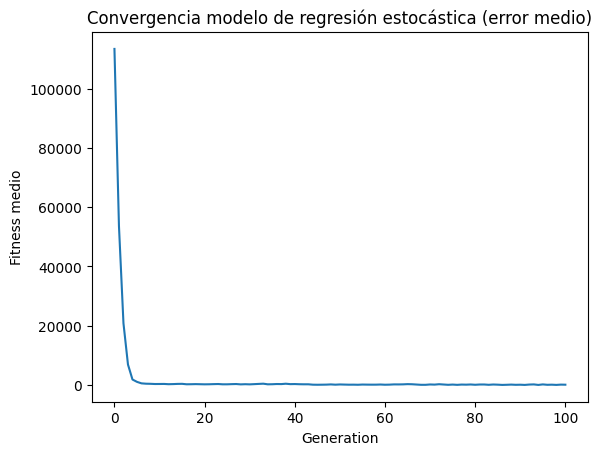

In [ ]:
plt.plot(df['gen'], df['avg'])
plt.title('Convergencia modelo de regresión estocástica (error medio)')
plt.xlabel('Generation')
plt.ylabel('Fitness medio')
plt.show()

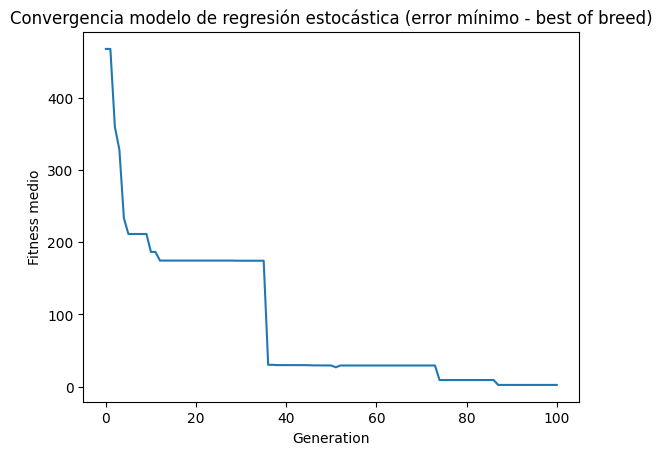

In [ ]:
plt.plot(df['gen'], df['min'])
plt.title('Convergencia modelo de regresión estocástica (error mínimo - best of breed)')
plt.xlabel('Generation')
plt.ylabel('Fitness medio')
plt.show()

https://deap.readthedocs.io/en/master/tutorials/basic/part3.html

# Minimización con restricciones

El ejemplo de la regresión no estaba mal, pero tampoco vamos a reinventar la rueda. Donde realmente marcan la diferencia los meta-heurísticos es a la hora de resolver problemas complejos, bien por la estructura de la información que contienen o por que existan restricciones de distinto tipo. En este ejemplo vamos a intentar buscar cual sería el óptimo del volumen del cilindro dadas unas condiciones.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Cylinder.svg/1200px-Cylinder.svg.png" width="100px"></img>


minimizar el volumen:

$$f(d,h) =  h * \pi * (d/2)^2 $$

sujeto a:

$$g_1(d,h) = (\pi d^2h/4) \geq 300$$

bounds:
$$ d_{min} \leq d \leq d_{max} $$
$$ h_{min} \leq h \leq h_{max} $$


En este caso las restricciones las **haremos a mano** pero podríamos utilizar [las funciones específicas de restricciones en deap](http://deap.gel.ulaval.ca/doc/dev/api/tools.html#constraints)



In [ ]:
d_min = 5
d_max = 10

h_min = 3
h_max = 7
# Definimos nuestra función de objetivo / fitness (h, d)
def objective(individual):
    h = individual[0]
    d = individual[1]
    result =  h * math.pi * (d/2)**2

    #
    # Aplicamos una penalización si no se cumple el valor
    # la penalizaciónes muy grande
    #
    penalty = 0
    result = penalty + 0 if ((math.pi * d**2 * h) / 4) >= 300 else 1e6
    result = penalty + 0 if (d > d_min and d < d_max) else  1e6
    result = penalty + 0 if (h > h_min and h < h_max) else  1e6
    result = result + penalty
    return result,

toolbox = base.Toolbox()

# Generador de atributosructura
toolbox.register("attr_float", random.uniform, 1, d_max)

# Inicializadores de la estructura
# Inviduo como 100 atributos booleanos y población como una repetición de individuos
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Declaramos una serie de operadores (algunos de ellos a partir de los ya disponibles en tools)
toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxUniform, indpb = 0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=2.0, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)



In [ ]:
pop, log, hof = genetic_algorithm(npop=100, ngen=100, toolbox = toolbox)
h = hof.items[0][0]
d = hof.items[0][1]
print('h=' + str(round(h,3)) + ' d=' + str(round(d,3)))

h=5.285 d=6.672


Mostramos el gráfico de convergencia

In [ ]:
df = pd.DataFrame(log)
df.head()

,gen,nevals,avg,std,min,max
0,0,100,560000.0,496386.945840,0.0,1000000.0
1,1,61,160000.0,366606.055596,0.0,1000000.0
2,2,47,0.0,0.000000,0.0,0.0
3,3,62,0.0,0.000000,0.0,0.0
4,4,50,0.0,0.000000,0.0,0.0


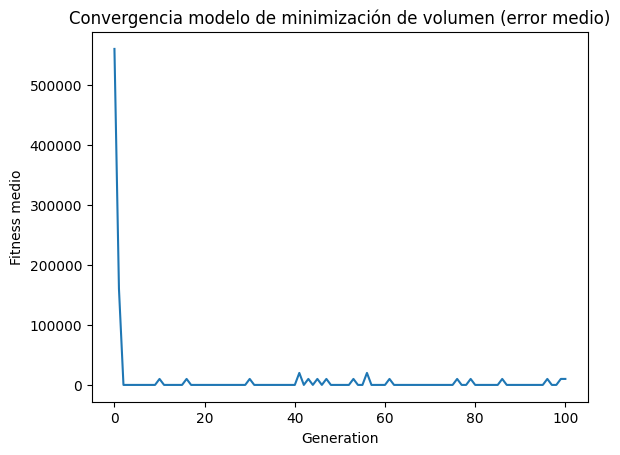

In [ ]:
plt.plot(df['gen'], df['avg'])
plt.title('Convergencia modelo de minimización de volumen (error medio)')
plt.xlabel('Generation')
plt.ylabel('Fitness medio')
plt.show()